# I. First step : Simple Convolutionnal Neural Network (CNN)

## On MNIST

### Import the library

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor

### Collecting the data

In [59]:
from torchvision import transforms
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = transform,
    download = True,
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = transform
)

In [60]:
print("shape of train data : " , train_data.data.size())
print("shape of test data : " , test_data.data.size())
print("shape of train labels : " , train_data.targets.size())

shape of train data :  torch.Size([60000, 28, 28])
shape of test data :  torch.Size([10000, 28, 28])
shape of train labels :  torch.Size([60000])


### Preprocessing

In [61]:
from torch.utils.data import DataLoader

loaders = {
    'train' : DataLoader(train_data,
                         batch_size=128,
                         shuffle=True,
                         num_workers=1),

    'test'  : DataLoader(test_data,
                         batch_size=128,
                         shuffle=True,
                         num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x1763efa90>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1763ef790>}

tensor(5)


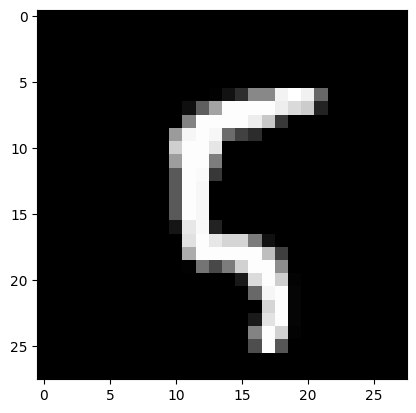

In [62]:
plt.imshow(train_data.data[100],cmap='gray')
print(train_data.targets[100])

### Building the network

In [63]:
import torch.nn as nn
from torch.nn import Sequential,Conv2d,AvgPool2d,Flatten,Linear,Sigmoid

In [64]:
nb_epoch = 20

#Define the model Sequential

model = Sequential(
    Conv2d(in_channels = 1,out_channels = 6,kernel_size = (5,5),padding = 2),
    Sigmoid(),
    AvgPool2d(kernel_size = (2,2),stride = 2),
    Conv2d(in_channels = 6,out_channels = 16,kernel_size = (5,5)),
    Sigmoid(),
    AvgPool2d(kernel_size = (2,2),stride = 2),
    Flatten(),
    Linear(16*5*5,120),
    Sigmoid(),
    Linear(120,84),
    Sigmoid(),
    Linear(84,10)
)

In [65]:
from torchvision import models
from torchsummary import summary
print(model)

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): Sigmoid()
  (2): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Sigmoid()
  (5): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): Sigmoid()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): Sigmoid()
  (11): Linear(in_features=84, out_features=10, bias=True)
)


In [66]:
summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
           Sigmoid-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
           Sigmoid-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
           Flatten-7                  [-1, 400]               0
            Linear-8                  [-1, 120]          48,120
           Sigmoid-9                  [-1, 120]               0
           Linear-10                   [-1, 84]          10,164
          Sigmoid-11                   [-1, 84]               0
           Linear-12                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
---------------------------------

In [67]:
import torch.optim as optim

#Define Loss function and Optimizer :
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [68]:
num_epochs = 20

#Train the model:

def train(num_epochs, cnn, loaders):
    loss_value = np.zeros((20,2))
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(loaders['train'], 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = cnn(inputs)
            print(outputs)
            print(labels)
            print(outputs.size())
            print(labels.size())
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if (i+1) % 100 == 0:    # print every 100 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
                running_loss = 0.0
        loss_value[epoch] = [epoch,loss.item()]
    print('Finished Training')
    return loss_value
loss_value  = train(nb_epoch,model, loaders)

tensor([[-0.0122, -0.0787, -0.6686,  ...,  0.3027,  0.4691, -0.0362],
        [-0.0120, -0.0787, -0.6687,  ...,  0.3029,  0.4690, -0.0364],
        [-0.0123, -0.0787, -0.6687,  ...,  0.3025,  0.4689, -0.0363],
        ...,
        [-0.0121, -0.0787, -0.6687,  ...,  0.3027,  0.4691, -0.0361],
        [-0.0121, -0.0785, -0.6687,  ...,  0.3029,  0.4692, -0.0363],
        [-0.0122, -0.0787, -0.6687,  ...,  0.3027,  0.4691, -0.0362]],
       grad_fn=<AddmmBackward0>)
tensor([8, 5, 3, 7, 2, 5, 7, 5, 1, 3, 5, 7, 7, 8, 4, 7, 7, 6, 1, 5, 4, 2, 1, 7,
        3, 8, 7, 4, 8, 8, 3, 4, 1, 6, 0, 2, 7, 9, 5, 0, 2, 5, 6, 8, 5, 0, 5, 6,
        5, 6, 2, 8, 3, 8, 2, 1, 7, 5, 4, 0, 6, 0, 6, 0, 2, 6, 1, 6, 8, 3, 8, 0,
        7, 5, 1, 7, 8, 8, 8, 9, 2, 4, 5, 2, 4, 3, 2, 9, 5, 5, 1, 4, 6, 9, 6, 8,
        6, 0, 6, 8, 8, 5, 0, 6, 0, 6, 0, 4, 2, 3, 7, 8, 3, 3, 9, 2, 1, 5, 2, 0,
        2, 0, 9, 1, 3, 4, 7, 3])
torch.Size([128, 10])
torch.Size([128])


IndexError: too many indices for tensor of dimension 1

In [ ]:
#Test the model:

def test(cnn,loaders):
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in loaders['test']:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = cnn(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            print(labels.size(0))
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')
test(model,loaders)

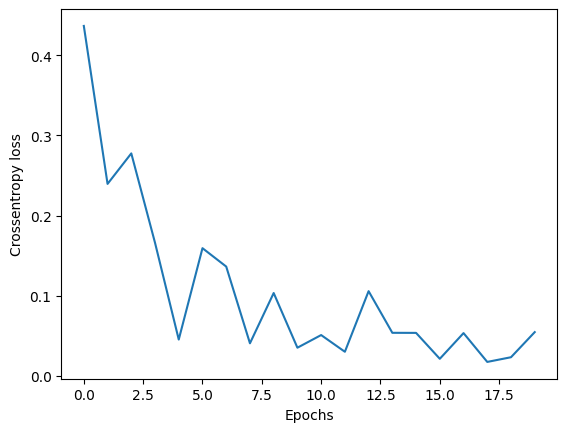

In [69]:
#Plot the loss
plt.plot(loss_value[:,0],loss_value[:,1])
plt.xlabel("Epochs")
plt.ylabel("Crossentropy loss")
plt.show()

# II. Second step: Simple Convolutionnal Neural Network on more complex data.

### Load the data

In [85]:
from torch.utils.data import TensorDataset

xTrain=np.load('./pathmnist/train_images.npy')
xTest=np.load('./pathmnist/test_images.npy')
yTrain=np.load('./pathmnist/train_labels.npy')
yTest=np.load('./pathmnist/test_labels.npy')

xTrain = torch.Tensor(xTrain)# transform to torch tensor
yTrain = torch.LongTensor(yTrain)
xTest = torch.Tensor(xTest)
yTest = torch.LongTensor(yTest)

#Change the size (:,28,28,3) to (:,3,28,28)
xTrain = xTrain.permute(0, 3, 1, 2)
xTest = xTest.permute(0, 3, 1, 2)

train_dataset = TensorDataset(xTrain,yTrain) # create your datset
test_dataset = TensorDataset(xTest,yTest)

loaders = {
    'train' : DataLoader(train_dataset,
                         batch_size=64,
                         shuffle=100,
                         num_workers=1),

    'test'  : DataLoader(test_dataset,
                         batch_size=64,
                         shuffle=100,
                         num_workers=1),
}
loaders


{'train': <torch.utils.data.dataloader.DataLoader at 0x15eeaaf40>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x177de97c0>}

### Building the network

In [86]:
from torch import sigmoid,flatten

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = Conv2d(in_channels = 3,out_channels = 6,kernel_size = (5,5),padding = 2)
        self.pool = AvgPool2d(kernel_size = (2,2),stride = 2)
        self.conv2 = Conv2d(in_channels = 6,out_channels = 16,kernel_size = (5,5))
        self.fc1 = Linear(16 * 5 * 5, 120)
        self.fc2 = Linear(120, 84)
        self.fc3 = Linear(84, 9)

    def forward(self, x):
        x = self.pool(sigmoid(self.conv1(x)))
        x = self.pool(sigmoid(self.conv2(x)))
        x = flatten(x,1) # flatten all dimensions except batch
        x = sigmoid(self.fc1(x))
        x = sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()

In [87]:
print(model)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=9, bias=True)
)


In [88]:
summary(model,(3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         AvgPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         AvgPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                    [-1, 9]             765
Total params: 61,921
Trainable params: 61,921
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


In [89]:
def train(num_epochs, cnn, loaders):
    loss_value = np.zeros((20,2))
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(loaders['train'], 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = cnn(inputs)
            loss = criterion(outputs, labels[:,0])
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if (i+1) % 100 == 0:    # print every 100 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
                running_loss = 0.0
        loss_value[epoch] = [epoch,loss.item()]
    print('Finished Training')
    return loss_value

loss_value  = train(nb_epoch,model,loaders)

[1,   100] loss: 2.248
[1,   200] loss: 2.245
[1,   300] loss: 2.237
[1,   400] loss: 2.239
[1,   500] loss: 2.244
[1,   600] loss: 2.237
[1,   700] loss: 2.246
[1,   800] loss: 2.233
[1,   900] loss: 2.246
[1,  1000] loss: 2.241
[1,  1100] loss: 2.245
[1,  1200] loss: 2.246
[1,  1300] loss: 2.241
[1,  1400] loss: 2.236
[2,   100] loss: 2.236
[2,   200] loss: 2.241
[2,   300] loss: 2.238
[2,   400] loss: 2.241
[2,   500] loss: 2.241
[2,   600] loss: 2.241
[2,   700] loss: 2.246
[2,   800] loss: 2.243
[2,   900] loss: 2.247
[2,  1000] loss: 2.243
[2,  1100] loss: 2.245
[2,  1200] loss: 2.240
[2,  1300] loss: 2.244
[2,  1400] loss: 2.237
[3,   100] loss: 2.250
[3,   200] loss: 2.238
[3,   300] loss: 2.246
[3,   400] loss: 2.242
[3,   500] loss: 2.243
[3,   600] loss: 2.238
[3,   700] loss: 2.241
[3,   800] loss: 2.243
[3,   900] loss: 2.239
[3,  1000] loss: 2.245
[3,  1100] loss: 2.244
[3,  1200] loss: 2.235
[3,  1300] loss: 2.248
[3,  1400] loss: 2.230
[4,   100] loss: 2.250
[4,   200] 

In [92]:
def test(cnn,loaders):
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in loaders['test']:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = cnn(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            print(labels.size(0))
            print((predicted == labels).sum().item())
            correct += (predicted == labels).sum().item()
    print(correct)
    print(total)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')

test(model,loaders)

64
960
64
704
64
768
64
896
64
832
64
704
64
1088
64
768
64
512
64
704
64
896
64
832
64
384
64
384
64
896
64
576
64
768
64
960
64
768
64
896
64
832
64
512
64
1280
64
576
64
640
64
704
64
704
64
896
64
640
64
832
64
960
64
896
64
576
64
448
64
576
64
640
64
640
64
512
64
704
64
960
64
576
64
704
64
960
64
960
64
960
64
576
64
704
64
768
64
640
64
896
64
704
64
576
64
320
64
1088
64
576
64
512
64
1152
64
704
64
704
64
1216
64
1280
64
704
64
512
64
448
64
1216
64
768
64
576
64
832
64
768
64
704
64
512
64
960
64
1024
64
768
64
704
64
576
64
960
64
832
64
640
64
896
64
768
64
896
64
576
64
896
64
768
64
768
64
1024
64
832
64
640
64
512
64
768
64
1024
64
768
64
896
64
576
64
768
64
768
64
832
64
960
64
640
64
832
64
320
64
832
64
896
64
640
64
768
64
896
64
832
64
896
64
704
64
960
64
512
12
12
85580
7180
Accuracy of the network on the 10000 test images: 1191.9220055710307 %


In [ ]:
#Plot the loss
plt.plot(loss_value[:,0],loss_value[:,1])
plt.xlabel("Epochs")
plt.ylabel("Crossentropy loss")
plt.show()